In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt
from timeit import default_timer as timer 

In [ ]:
#from numba import jit, cuda

In [2]:
a=np.zeros((8,3))
a.shape



(8, 3)

In [3]:
a=np.array([[1,2,3],[4,5,6]])
b=np.array([[10,11],[20,21],[30,31]])

In [4]:
def matmul(a,b):
    c=np.zeros((a.shape[0],b.shape[1]))
    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            t=0
            for k in range(a.shape[1]):
                t+=a[i,k]*b[k,j]
            c[i,j]=t
    return c 

In [5]:
c=matmul(a,b)
c

array([[140., 146.],
       [320., 335.]])

In [6]:
np.matmul(a,b)

array([[140, 146],
       [320, 335]])

In [7]:
def plot_custom_func(n):
    y=[]
    x=[]
    for i in range(2**5,n+1):
        a=np.random.rand(i,i)
        b=np.random.rand(i,i)
        if(i%100==0):
            print(i)
        x.append(i)
        t1=timer()
        c=matmul(a,b)
        t2=timer()
        gflop=(2*(i**3))/10**9
        gflops=gflop/(t2-t1)
        y.append(gflops)
    return x,y
        

In [8]:
x,y=plot_custom_func(350)

100
200
300


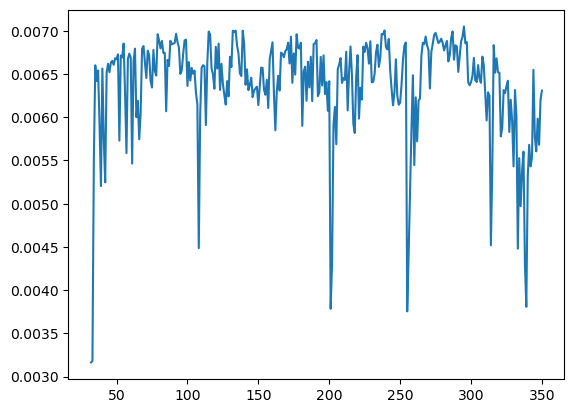

In [9]:
plt.plot(x,y)
plt.show()

In [10]:
def plot_numpy_func(n):
    y=[]
    x=[]
    for i in range(2**5,n+1):
        if(i%200==0):
            print(i)
        a=np.random.rand(i,i)
        b=np.random.rand(i,i)
        t1=timer()
        c=np.matmul(a,b)
        t2=timer()
        x.append(i)
        gflop=(2*(i**3))/10**9
        gflops=gflop/(t2-t1)
        y.append(gflops)
        
    return x,y

In [11]:
a,b=plot_numpy_func(2**11)

200
400
600
800
1000
1200
1400
1600
1800
2000


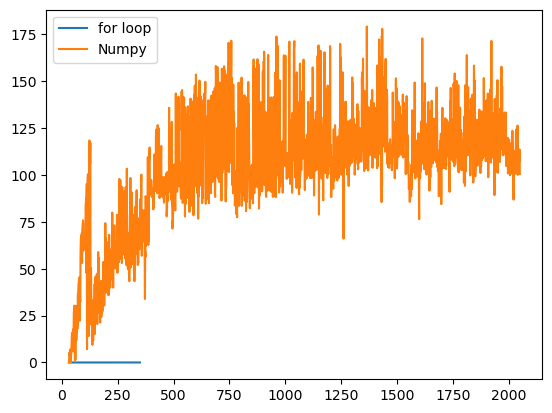

In [12]:
plt.plot(x,y,label='for loop')
plt.plot(a,b,label='Numpy')
plt.legend()
plt.show()

In [ ]:
'''
from numba import cuda


# function optimized to run on gpu 
@cuda.jit  
                 
def plot_numpy_func_gpu(n):
    y=[]
    x=[]
    for i in range(2**5,n+1):
        a=np.random.rand(i,i)
        b=np.random.rand(i,i)
        t1=timer()
        c=np.matmul(a,b)
        t2=timer()
        x.append(i)
        gflop=(2*(i**3))/10**9
        gflops=gflop/(t2-t1)
        y.append(gflops)
        
    return x,y
'''

In [3]:
'''
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
'''

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 659010959017257540
]


In [10]:
# import tensorflow as tf 
# tf.test.is_gpu_available(
#     cuda_only=False, min_cuda_compute_capability=None
# )

False

In [11]:
# tf.config.list_physical_devices('GPU')

[]